In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [3]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\Users\Sherry\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8
  JVM stdout: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8\h2o_Sherry_started_from_python.out
  JVM stderr: C:\Users\Sherry\AppData\Local\Temp\tmpwmfvs9a8\h2o_Sherry_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_Sherry_1c7xoy
H2O cluster total nodes:,1
H2O cluster free memory:,3.973 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
raw_dataset = h2o.import_file("C:\\Users\\Sherry\\Desktop\\bank.csv")
raw_dataset.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [5]:
raw_dataset.describe()

Rows:11162
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,int
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,0.0
mean,41.231947679627304,,,,,1528.5385235620856,,,,15.658036194230426,,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358,,0.4738398136534671
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,1.0
sigma,11.913369192215526,,,,,3225.413325946151,,,,8.420739541006451,,347.1283857163058,2.722077181661486,108.75828197197697,2.2920072186705047,,0.4993375439121514
zeros,0,,,,,774,,,,0,,0,0,0,8324,,5873
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,1.0
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,1.0
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,1.0


In [6]:
raw_dataset['deposit'] = raw_dataset['deposit'].asfactor()

In [7]:
raw_dataset.head()

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1


In [8]:
raw_dataset.describe()

Rows:11162
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,
mean,41.231947679627304,,,,,1528.5385235620856,,,,15.658036194230426,,371.99381831213043,2.508421429851281,51.33040673714388,0.8325568894463358,,
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,
sigma,11.913369192215526,,,,,3225.413325946151,,,,8.420739541006451,,347.1283857163058,2.722077181661486,108.75828197197697,2.2920072186705047,,
zeros,0,,,,,774,,,,0,,0,0,0,8324,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,1
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,1
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,1


In [9]:
splits = raw_dataset.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]


In [10]:
splits[0]

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,1
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,1
30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,1


In [11]:
y = "deposit"
x  = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']

In [12]:
aml = H2OAutoML(max_models = 25, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |
14:03:07.178: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [13]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200214_140307,0.927899,0.33529,0.89438,0.131122,0.31992,0.102349
StackedEnsemble_BestOfFamily_AutoML_20200214_140307,0.927427,0.335383,0.892893,0.132205,0.320122,0.102478
GBM_5_AutoML_20200214_140307,0.927411,0.330163,0.891286,0.133382,0.318312,0.101323
GBM_3_AutoML_20200214_140307,0.926513,0.333499,0.89158,0.132204,0.319784,0.102262
GBM_1_AutoML_20200214_140307,0.925984,0.334558,0.890969,0.134676,0.320617,0.102795
GBM_2_AutoML_20200214_140307,0.925285,0.335635,0.886999,0.133757,0.320596,0.102782
GBM_4_AutoML_20200214_140307,0.92415,0.340764,0.887306,0.137503,0.323473,0.104635
GBM_grid__1_AutoML_20200214_140307_model_8,0.92258,0.355628,0.889748,0.144343,0.329676,0.108686
GBM_grid__1_AutoML_20200214_140307_model_2,0.922399,0.346638,0.886594,0.14125,0.327263,0.107101
DRF_1_AutoML_20200214_140307,0.920628,0.377086,0.862076,0.137708,0.327226,0.107077


In [14]:
preds = aml.predict(test)
preds

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
1,0.141787,0.858213
1,0.196454,0.803546
0,0.876268,0.123732
1,0.122358,0.877642
0,0.928681,0.0713189
1,0.0923758,0.907624
1,0.286828,0.713172
1,0.188755,0.811245
1,0.528146,0.471854
1,0.0870629,0.912937


In [15]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [16]:
metalearner.coef_norm()

{'Intercept': -0.32241276786905404,
 'GBM_5_AutoML_20200214_140307': 0.8335929245499633,
 'GBM_3_AutoML_20200214_140307': 0.33542864089943625,
 'GBM_1_AutoML_20200214_140307': 0.30381287113397754,
 'GBM_2_AutoML_20200214_140307': 0.13203629119091118,
 'GBM_4_AutoML_20200214_140307': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_8': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_2': 0.0,
 'DRF_1_AutoML_20200214_140307': 0.3247121234647919,
 'XRT_1_AutoML_20200214_140307': 0.31291066587815664,
 'GBM_grid__1_AutoML_20200214_140307_model_6': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_4': 0.017604162436699634,
 'GBM_grid__1_AutoML_20200214_140307_model_7': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_3': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_1': 0.13229895789652854,
 'GLM_1_AutoML_20200214_140307': 0.0,
 'GBM_grid__1_AutoML_20200214_140307_model_5': 0.0,
 'DeepLearning_grid__1_AutoML_20200214_140307_model_3': 0.0056610058501196945,
 'DeepLearning_1_AutoML_20200214_14030

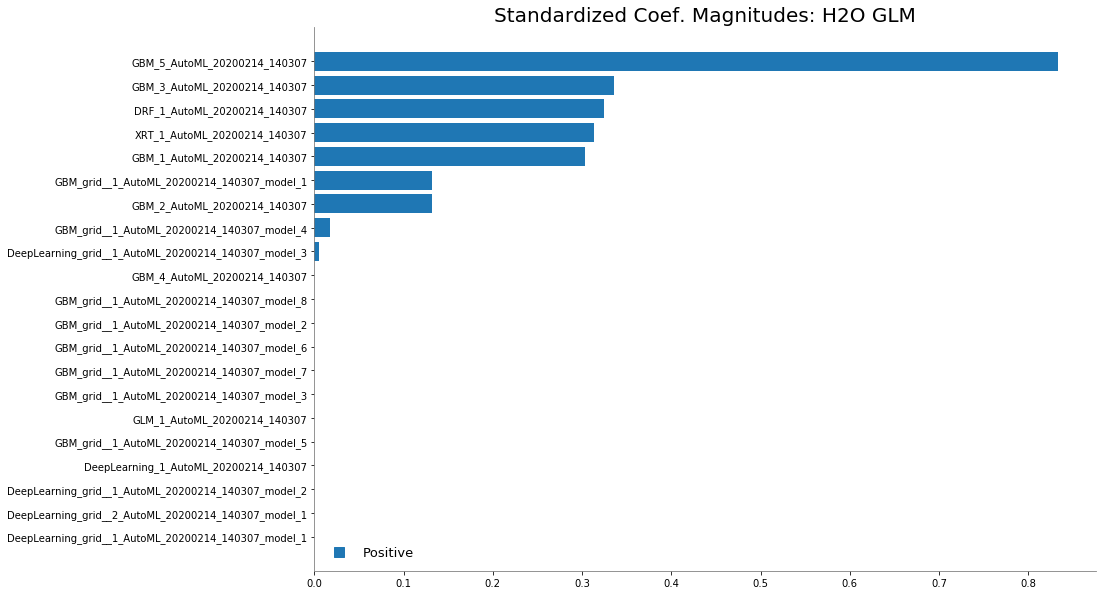

In [17]:
%matplotlib inline
metalearner.std_coef_plot()

In [18]:
h2o.save_model(aml.leader, path = "C:\\Users\\Sherry\\Desktop\\AutoMl")

'C:\\Users\\Sherry\\Desktop\\AutoMl\\StackedEnsemble_AllModels_AutoML_20200214_140307'

In [19]:
aml.leader.download_mojo(path = "C:\\Users\\Sherry\\Desktop\\AutoMl")

'C:\\Users\\Sherry\\Desktop\\AutoMl\\StackedEnsemble_AllModels_AutoML_20200214_140307.zip'

In [20]:
perf = aml.leader.model_performance(test)
print(perf)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.10007260747441912
RMSE: 0.31634254768275977
LogLoss: 0.32695656128314315
Null degrees of freedom: 2196
Residual degrees of freedom: 2187
Null deviance: 3039.0471678396407
Residual deviance: 1436.6471302781313
AIC: 1456.6471302781313
AUC: 0.9327583741880999
AUCPR: 0.8998959458471526
Gini: 0.8655167483761999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3468797363663131: 


,,0,1,Error,Rate
0,0,945.0,214.0,0.1846,(214.0/1159.0)
1,1,74.0,964.0,0.0713,(74.0/1038.0)
2,Total,1019.0,1178.0,0.1311,(288.0/2197.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.346880,0.870036,249.0
1,max f2,0.121323,0.922057,326.0
2,max f0point5,0.634387,0.853849,170.0
3,max accuracy,0.346880,0.868912,249.0
4,max precision,0.948004,1.000000,0.0
5,max recall,0.054121,1.000000,367.0
6,max specificity,0.948004,1.000000,0.0
7,max absolute_mcc,0.346880,0.744891,249.0
8,max min_per_class_accuracy,0.589256,0.860224,184.0
9,max mean_per_class_accuracy,0.346880,0.872034,249.0



Gains/Lift Table: Avg response rate: 47.25 %, avg score: 47.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010014,0.942582,2.116570,2.116570,1.000000,0.945579,1.000000,0.945579,0.021195,0.021195,111.657033,111.657033
1,,2,0.020027,0.940139,2.020363,2.068466,0.954545,0.941472,0.977273,0.943525,0.020231,0.041426,102.036259,106.846646
2,,3,0.030041,0.937955,2.020363,2.052432,0.954545,0.938809,0.969697,0.941953,0.020231,0.061657,102.036259,105.243183
3,,4,0.040055,0.936482,2.020363,2.044415,0.954545,0.937219,0.965909,0.940770,0.020231,0.081888,102.036259,104.441452
4,,5,0.050068,0.934407,2.116570,2.058846,1.000000,0.935339,0.972727,0.939684,0.021195,0.103083,111.657033,105.884568
5,,6,0.100137,0.926144,2.001121,2.029983,0.945455,0.930208,0.959091,0.934946,0.100193,0.203276,100.112104,102.998336
6,,7,0.150205,0.916140,1.924155,1.994707,0.909091,0.921775,0.942424,0.930555,0.096339,0.299615,92.415484,99.470719
7,,8,0.200273,0.906633,1.866430,1.962638,0.881818,0.911702,0.927273,0.925842,0.093449,0.393064,86.643020,96.263794
8,,9,0.299954,0.872781,1.836294,1.920651,0.867580,0.891577,0.907436,0.914455,0.183044,0.576108,83.629389,92.065107
9,,10,0.400091,0.779694,1.674015,1.858922,0.790909,0.834574,0.878271,0.894462,0.167630,0.743738,67.401471,85.892183
